In [67]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from itertools import combinations 

In [68]:
data = os.path.join('datasets', 'roe_cof.csv')

df = pd.read_csv(data, parse_dates=[0], index_col=0, squeeze=True).dropna()


df.head(-1)

,ucb_roe,ucb_cof,fin_pe,fin_pb,loan_gth,asset_yld,rrr
2008-03-01,11.08000,3.12000,14.692117,1.784067,4.447821,7.37000,5.00
2008-06-01,10.59000,2.99000,12.801276,1.468649,16.208615,7.11000,5.25
2008-09-01,9.40000,3.03000,13.514477,1.603242,14.716742,7.27000,6.00
2008-12-01,7.17000,3.01000,15.569823,1.340741,12.149364,7.23000,5.50
2009-03-01,7.26000,3.03000,15.236230,1.236850,14.135784,7.56000,4.75
2009-06-01,8.65000,2.85000,19.284649,1.592710,6.770386,7.40000,4.25
2009-09-01,9.99000,2.72000,21.240830,1.882077,6.453792,7.24000,4.00
2009-12-01,11.38000,2.37000,20.324328,1.924171,8.652602,6.55000,4.00
2010-03-01,11.90000,2.25000,19.329883,1.911234,2.422627,6.55000,4.00
2010-06-01,11.77000,2.18000,19.397814,2.028665,6.179292,6.40000,4.00


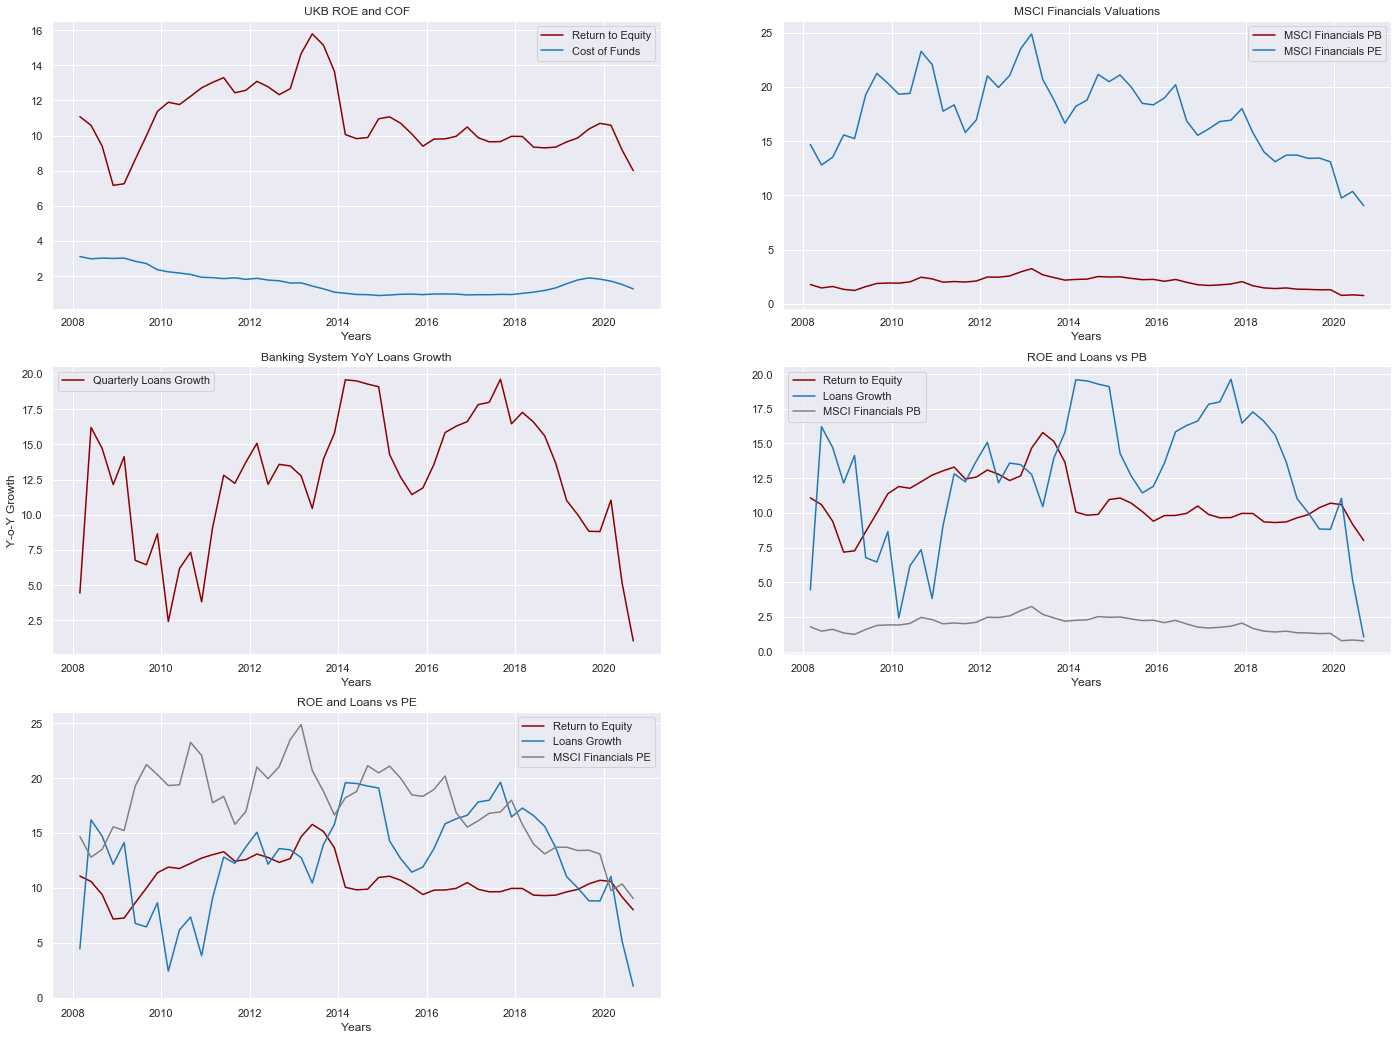

In [69]:
sns.set(style="darkgrid")

fig = plt.figure(figsize=(24,18))

plt.subplot(3, 2, 1)
plt.plot(df.ucb_roe, color='darkred', label='Return to Equity')
plt.plot(df.ucb_cof, color='tab:blue', label='Cost of Funds')
plt.title('UKB ROE and COF')
plt.legend()
plt.xlabel('Years')

plt.subplot(3, 2, 2)
plt.plot(df.fin_pb, color='darkred', label='MSCI Financials PB')
plt.plot(df.fin_pe, color='tab:blue', label='MSCI Financials PE')
plt.title('MSCI Financials Valuations')
plt.legend()
plt.xlabel('Years')

plt.subplot(3, 2, 3)
plt.plot(df.loan_gth, color='darkred', label='Quarterly Loans Growth')
plt.title('Banking System YoY Loans Growth')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Y-o-Y Growth')
# plt.axhline(linewidth=1, linestyle='dashed', color='k')

plt.subplot(3, 2, 4)
plt.plot(df.ucb_roe, color='darkred', label='Return to Equity')
plt.plot(df.loan_gth, color='tab:blue', label='Loans Growth')
plt.plot(df.fin_pb, color='gray', label='MSCI Financials PB')
plt.title('ROE and Loans vs PB')
plt.legend()
plt.xlabel('Years')

plt.subplot(3, 2, 5)
plt.plot(df.ucb_roe, color='darkred', label='Return to Equity')
plt.plot(df.loan_gth, color='tab:blue', label='Loans Growth')
plt.plot(df.fin_pe, color='gray', label='MSCI Financials PE')
plt.title('ROE and Loans vs PE')
plt.legend()
plt.xlabel('Years')

#plt.subplot(3, 2, 6)
#plt.plot(df.fin_pb, color='darkred', label='MSCI Financials PB')
#plt.plot(df.fin_pe, color='tab:blue', label='MSCI Financials PE')
#plt.title(' ')
#plt.legend()
#plt.xlabel('Years')

plt.show()

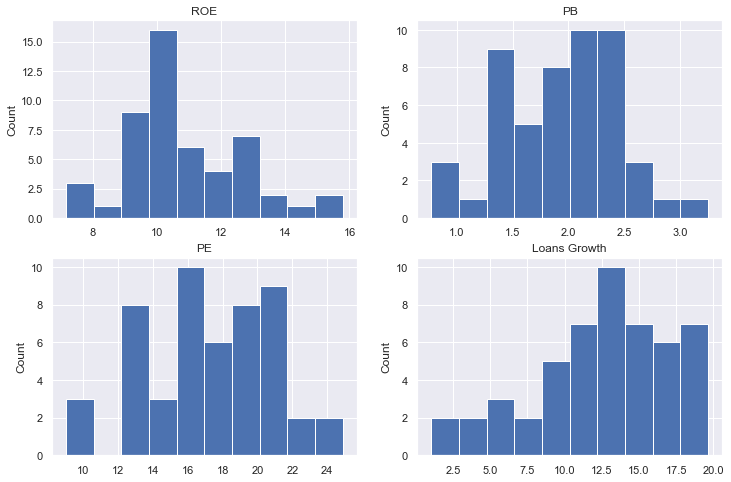

In [70]:
def all_dist():
    fig = plt.figure(figsize=(12,8))

    plt.subplot(2,2,1)
    plt.hist(df.ucb_roe)
    plt.title('ROE')
    plt.ylabel('Count')

    plt.subplot(2,2,2)
    plt.hist(df.fin_pb)
    plt.title('PB')
    plt.ylabel('Count')

    plt.subplot(2, 2, 3)
    plt.hist(df.fin_pe)
    plt.title('PE')
    plt.ylabel('Count')

    plt.subplot(2, 2, 4)
    plt.hist(df.loan_gth)
    plt.title('Loans Growth')
    plt.ylabel('Count')
    
all_dist()

In [71]:
#testing for stationarity
def adf_test(series, name=None, num=None):
    result = adfuller(series)
    if name == None:
        name = str(series.name)
    if num != None:
        name = 'Series %s' % str(num)
    print('\n%s:' %name)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

roe = df.ucb_roe
loans = df.loan_gth
pb = df.fin_pb
pe = df.fin_pe

adf_test(roe)
print('Sample size: %s' %len(roe))
adf_test(loans)
print('Sample size: %s' %len(loans))
adf_test(pb)
print('Sample size: %s' %len(pb))
adf_test(pe)
print('Sample size: %s' %len(pe))



ucb_roe:
ADF Statistic: -1.718107
p-value: 0.421808
Sample size: 51

loan_gth:
ADF Statistic: -1.232395
p-value: 0.659507
Sample size: 51

fin_pb:
ADF Statistic: -0.633959
p-value: 0.863123
Sample size: 51

fin_pe:
ADF Statistic: 1.174175
p-value: 0.995803
Sample size: 51


### Stationarize

In [72]:
# The following code consolidates transofrmation steps into one
def normalize(series):
    ave, stdev = series.mean(), series.std()
    series = (series-ave)/stdev
    return series

def annual_vol(series):
    stdevs = series.groupby(series.index.year).std()
    return series.index.map(lambda d: stdevs.loc[d.year])

def variance_correct(series):
    return series/annual_vol(series)

def qtr_mean(series):
    means = series.groupby(series.index.month).mean()
    return series.index.map(lambda d: means.loc[d.month])

def seasonality_correct(series):
    return series - qtr_mean(series)

def make_stationary(*data, plot=False, headers=True):
    stdata = []
    for d in data:
        if headers == True:
            header = d.name
        d = normalize(d)
        d = d.diff().fillna(method="bfill")
        d = variance_correct(d)
        #d = seasonality_correct(d).fillna(method="bfill")
        d.name = header
        stdata.append(d)
        
    if len(stdata) == 1:
        return stdata[0]
    else:
        return stdata


ucb_roe:
ADF Statistic: -4.115633
p-value: 0.000912
Sample size: 51

loan_gth:
ADF Statistic: -5.351804
p-value: 0.000004
Sample size: 51

fin_pb:
ADF Statistic: -6.349738
p-value: 0.000000
Sample size: 51

fin_pe:
ADF Statistic: -6.285427
p-value: 0.000000
Sample size: 51


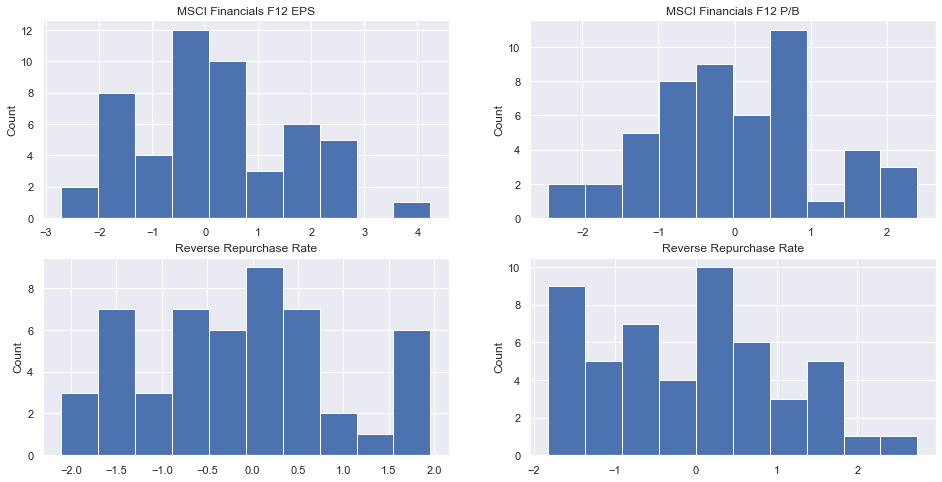

In [73]:
series = [roe, loans, pb, pe]
nseries = []

for s in series:
    header = s.name
    s = normalize(s)
    s = s.diff().fillna(method="bfill")
    s = variance_correct(s).fillna(method="bfill")
    s = s.replace([np.inf, -np.inf], np.nan).dropna()
    s.name = header
    nseries.append(s)
    adf_test(s)
    print('Sample size: %s' %len(s))

fig = plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
plt.hist(nseries[0])
plt.title('MSCI Financials F12 EPS')
plt.ylabel('Count')

plt.subplot(2,2,2)
plt.hist(nseries[1])
plt.title('MSCI Financials F12 P/B')
plt.ylabel('Count')

plt.subplot(2,2,3)
plt.hist(nseries[2])
plt.title('Reverse Repurchase Rate')
plt.ylabel('Count')

plt.subplot(2,2,4)
plt.hist(nseries[3])
plt.title('Reverse Repurchase Rate')
plt.ylabel('Count')

plt.show()

sdf = pd.concat(nseries, axis=1).fillna(method="ffill")

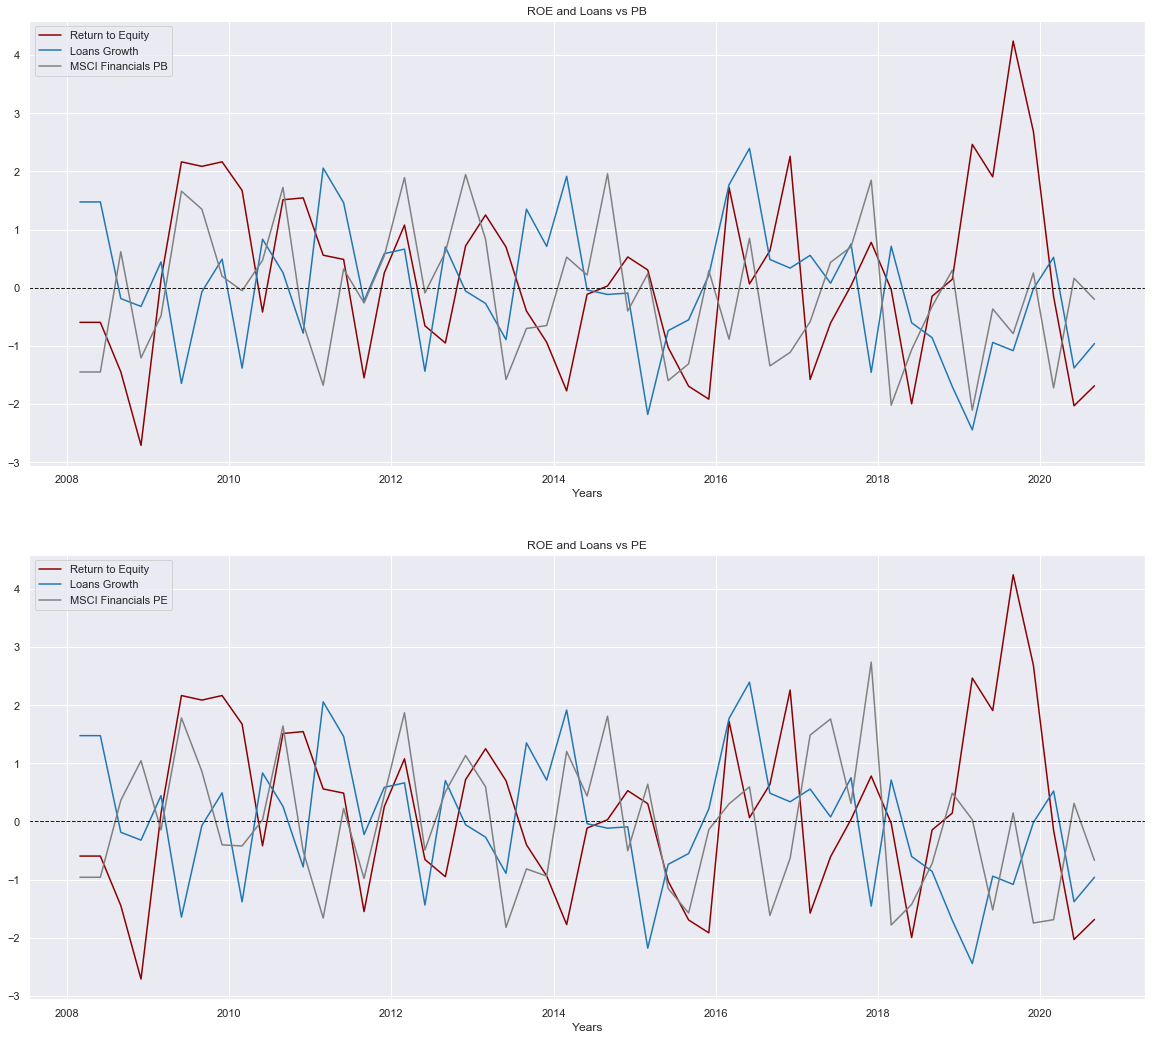

In [74]:
sns.set(style="darkgrid")

fig = plt.figure(figsize=(20,18))

plt.subplot(2, 1, 1)
plt.plot(sdf.ucb_roe, color='darkred', label='Return to Equity')
plt.plot(sdf.loan_gth, color='tab:blue', label='Loans Growth')
plt.plot(sdf.fin_pb, color='gray', label='MSCI Financials PB')
plt.title('ROE and Loans vs PB')
plt.legend()
plt.xlabel('Years')
plt.axhline(linewidth=1, linestyle='dashed', color='k')

plt.subplot(2, 1, 2)
plt.plot(sdf.ucb_roe, color='darkred', label='Return to Equity')
plt.plot(sdf.loan_gth, color='tab:blue', label='Loans Growth')
plt.plot(sdf.fin_pe, color='gray', label='MSCI Financials PE')
plt.title('ROE and Loans vs PE')
plt.legend()
plt.xlabel('Years')
plt.axhline(linewidth=1, linestyle='dashed', color='k')

plt.show()

### Testing Causality

In [75]:
def granger(s1, s2, lag=12):
    granger_df = pd.concat([s1, s2], axis=1).dropna()
    grangercausalitytests(granger_df, lag)

print('Testing causality\n')
print('ROE -> PB')
granger(sdf.fin_pb, sdf.ucb_roe)
print('----------------------------\n')
print('ROE -> PE')
granger(sdf.fin_pe, sdf.ucb_roe)
print('----------------------------\n')
print('Loans Growth -> PB')
granger(sdf.fin_pb, sdf.loan_gth)
print('----------------------------\n')
print('Loans Growth -> PE')
granger(sdf.fin_pe, sdf.loan_gth)


Testing causality

ROE -> PB

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5394  , p=0.4663  , df_denom=47, df_num=1
ssr based chi2 test:   chi2=0.5738  , p=0.4488  , df=1
likelihood ratio test: chi2=0.5705  , p=0.4500  , df=1
parameter F test:         F=0.5394  , p=0.4663  , df_denom=47, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8206  , p=0.0704  , df_denom=44, df_num=2
ssr based chi2 test:   chi2=6.2823  , p=0.0432  , df=2
likelihood ratio test: chi2=5.9110  , p=0.0521  , df=2
parameter F test:         F=2.8206  , p=0.0704  , df_denom=44, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8963  , p=0.0465  , df_denom=41, df_num=3
ssr based chi2 test:   chi2=10.1723 , p=0.0172  , df=3
likelihood ratio test: chi2=9.2260  , p=0.0264  , df=3
parameter F test:         F=2.8963  , p=0.0465  , df_denom=41, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:        

number of lags (no zero) 1
ssr based F test:         F=2.9453  , p=0.0927  , df_denom=47, df_num=1
ssr based chi2 test:   chi2=3.1333  , p=0.0767  , df=1
likelihood ratio test: chi2=3.0390  , p=0.0813  , df=1
parameter F test:         F=2.9453  , p=0.0927  , df_denom=47, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7248  , p=0.1900  , df_denom=44, df_num=2
ssr based chi2 test:   chi2=3.8415  , p=0.1465  , df=2
likelihood ratio test: chi2=3.6984  , p=0.1574  , df=2
parameter F test:         F=1.7248  , p=0.1900  , df_denom=44, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8294  , p=0.1569  , df_denom=41, df_num=3
ssr based chi2 test:   chi2=6.4253  , p=0.0927  , df=3
likelihood ratio test: chi2=6.0301  , p=0.1102  , df=3
parameter F test:         F=1.8294  , p=0.1569  , df_denom=41, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.4158  , p=0.0176  , df_denom=38, df_num=4
s

### Fitting VAR Model

In [76]:
### AUTOMATE MODEL SELECTION
def fit_tsmodel(data, model='VAR', lags=4):
    models = ['VAR','SARIMAX']

    if model in models:
        if model == models[0]:
            model = VAR
        elif model == models[1]:
            model == SARIMAX
    else:
        print('Model not supported')
        return None
    
    fmodel = model(data)          
    res = fmodel.fit(maxlags=lags)
    return res

In [77]:
def create_df(*series):
    df = pd.concat(series, axis=1).dropna()
    n = []
    for i in series:
        n.append(i.name)
    df.columns = n
    return df

res = fit_tsmodel(sdf,lags=4)
res.summary()

C:\Users\Derrick\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 10, Jan, 2021
Time:                     23:07:09
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    3.37442
Nobs:                     47.0000    HQIC:                   1.70491
Log likelihood:          -215.154    FPE:                    2.30421
AIC:                     0.697614    Det(Omega_mle):        0.670184
--------------------------------------------------------------------
Results for equation ucb_roe
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.322694         0.189681            1.701           0.089
L1.ucb_roe          0.415854         0.149588            2.780           0.005
L1.loan_gth        -0.120505         0.173382           -0.695    

In [78]:
print(r2_score(res.fittedvalues['fin_pe']+res.resid['fin_pe'],
  res.fittedvalues['fin_pe']))

print(r2_score(res.fittedvalues['fin_pb']+res.resid['fin_pb'],
  res.fittedvalues['fin_pb']))

0.5415740177827701
0.39762940908053257


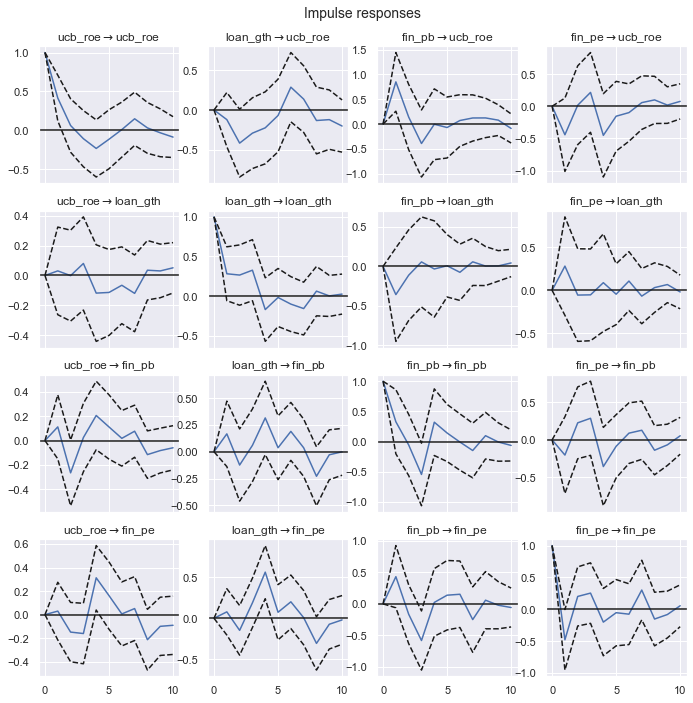

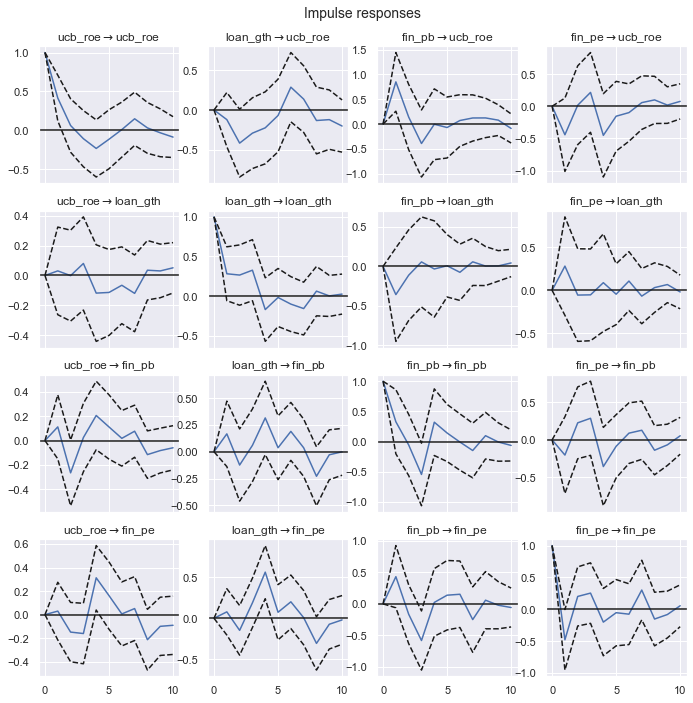

In [79]:
irf = res.irf(10)
irf.plot(orth=False)

***The y-axis is given in standard deviations and x-axis in lag-periods.***